In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import seaborn as sns

In [2]:
df_main = pd.read_csv(r'results_svm/results.csv', index_col='index')
df_author = pd.read_csv(r'results_svm/results_authors.csv', index_col='index')

In [3]:
def indextodate(df):
    list_date = []
    for index in df.index:
        list_date.append(index.split('_')[0])
    return list_date

In [4]:
list_date = indextodate(df_main)    

In [5]:
df_main['date']=list_date

In [6]:
df_main.sort_values(by=['date'], inplace=True)

In [7]:
df_main['prediction'].value_counts()

non_canon    66
canon        66
Name: prediction, dtype: int64

In [9]:
df_main[:5]

,metadata,proba canon,proba non_canon,prediction,accord,date
index,,,,,,
1816_Constant-Benjamin_Adolphe,canon,0.346334,0.653666,non_canon,False,1816
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar_(Tome-4),non_canon,0.129212,0.870788,non_canon,True,1816
1831_Hugo-Victor_Notre-Dame-de-Paris_(Tome-1),canon,0.585160,0.414840,canon,True,1831
1832_Sand-George_Valentine,non_canon,0.142692,0.857308,non_canon,True,1832
1833_Sand-George_Lelia,non_canon,0.241778,0.758222,non_canon,True,1833


In [10]:
import seaborn as sns

In [31]:
df_main['date_int']=[int(date) for date in df_main['date']]

Text(0, 0.5, 'Probability of being canonical')

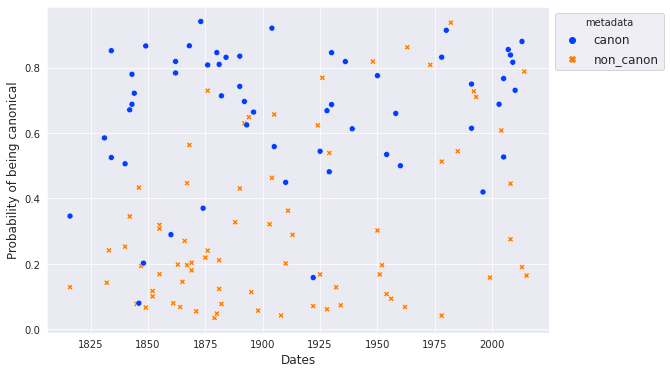

In [75]:
plt.figure(figsize=(9,6))
sns.set_palette('bright')
ax = sns.scatterplot(data=df_main, x='date_int', y='proba canon', hue='metadata', style="metadata")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize = 12)
ax.set_xlabel('Dates', fontsize = 12)
ax.set_ylabel('Probability of being canonical', fontsize = 12)

In [17]:
list_date_author = indextodate(df_author)

In [18]:
df_author['date']=list_date_author

In [22]:
df_author['date_int']=[int(date) for date in list_date_author]

In [24]:
df_author.sort_values(by=['date_int'], inplace=True)

In [51]:
df_author = df_author.sample(frac=1)#first row column metadata has to be canon for coherent visualizations

Text(0, 0.5, 'Probability of being canonical')

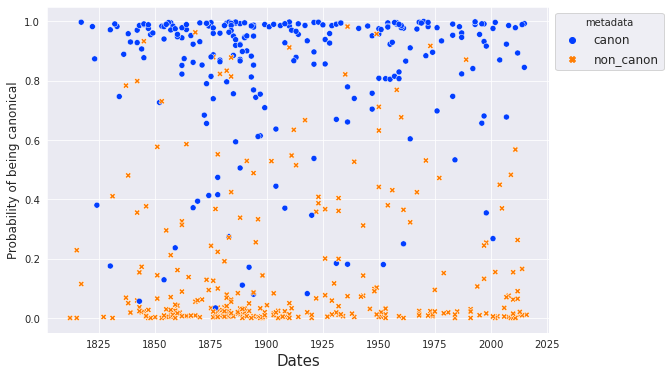

In [74]:
plt.figure(figsize=(9,6))
ax = sns.scatterplot(data=df_author, x='date_int', y='proba canon', hue='metadata', style="metadata")

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize = 12)
ax.set_xlabel('Dates', fontsize = 15)
ax.set_ylabel('Probability of being canonical', fontsize = 12)

In [25]:
df_author[df_author["date_int"]>1925].metadata.value_counts()

non_canon    108
canon         88
Name: metadata, dtype: int64

In [26]:
df_author[df_author["date_int"]<1925].metadata.value_counts()

non_canon    182
canon        145
Name: metadata, dtype: int64